# Linear Regression

Linear regression is a method to find a linear relationship between 2 variables, given a set of data.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Simple prediction
For the 1st exercise, we will be using values of an equation to feed in the model, and the model should return the values of the function.

In [2]:
def our_fn(x):
  return 8 * x + 9

In [3]:
# y = 8x + 9

# Create x data
x_data = [i for i in range(0, 200, 9)]
x_values = torch.tensor(x_data, dtype=torch.float32)
print("X:", x_values)
x_values = x_values.reshape(-1, 1) # reshape to 2D tensor instead
print("X reshaped, first 5 values\n", x_values[0:5])


# Create y data based on x values
y_data = [our_fn(x) for x in x_data]
y_values = torch.tensor(y_data, dtype=torch.float32)
print("Y:", y_values)
y_values = y_values.reshape(-1, 1)

X: tensor([  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.,  99.,
        108., 117., 126., 135., 144., 153., 162., 171., 180., 189., 198.])
X reshaped, first 5 values
 tensor([[ 0.],
        [ 9.],
        [18.],
        [27.],
        [36.]])
Y: tensor([   9.,   81.,  153.,  225.,  297.,  369.,  441.,  513.,  585.,  657.,
         729.,  801.,  873.,  945., 1017., 1089., 1161., 1233., 1305., 1377.,
        1449., 1521., 1593.])


In [4]:
# Defining important constants
INPUT_DIMENSION = 1 # Our input size is 1, which is the var x.
OUTPUT_DIMENSION = 1 # Our output size is 1, which is the var y.
LEARNING_RATE = 0.0001# Learning rate
EPOCHS = 100 # Number of epochs

In [5]:
# Defining our model
model = nn.Sequential(
    nn.BatchNorm1d(1),
    nn.Linear(INPUT_DIMENSION, OUTPUT_DIMENSION),
    nn.ReLU()
)

In [6]:
# Next, we need our loss function and our optimizer function.
loss = nn.MSELoss() # Mean-squared error loss
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

## Model training
We call `model.train()` to **switch to training mode**.

Afterwards, we train the model with the steps below in the comments.

In [7]:
loss_values = []

model.train()
for epoch in range(EPOCHS):

  # Do not accumulate gradiants, clear gradient buffer
  optimizer.zero_grad()
  # Make prediction
  outputs = model(x_values)
  # Calculate loss
  loss_value = loss(outputs, y_values)

  # Backward propagation
  loss_value.backward()
  # Optimization function
  optimizer.step()
  
  loss_values.append(loss_value.item())


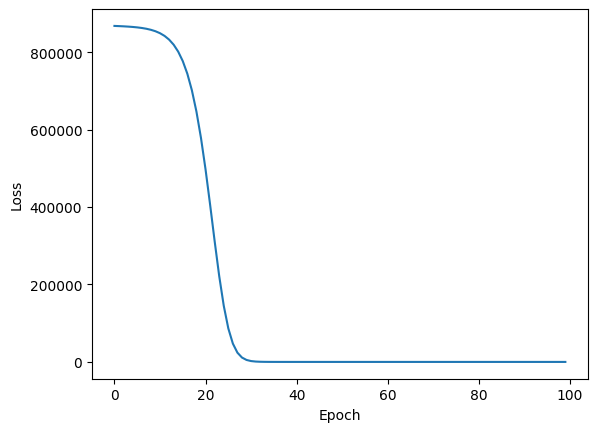

In [8]:
loss_values = np.array(loss_values)
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

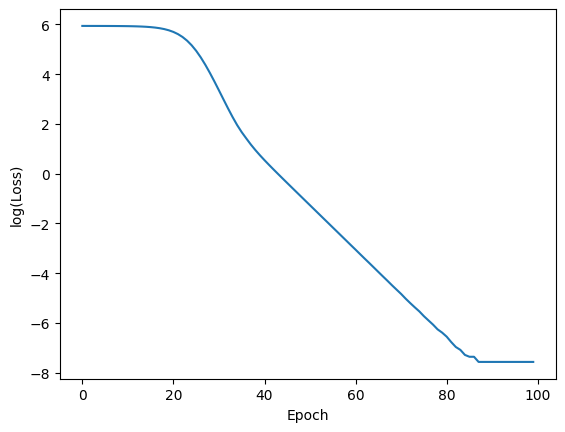

In [9]:
loss_values = np.log10(loss_values)
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('log(Loss)')
plt.show()

### Model evaluation
We call `model.eval()` to evaluate the model.  
We now evalate it with random values, and the model has to extrapolate from the original range of the training data.

In [10]:
# Evaluating our model with random values
model.eval()
import random

x1_data = [random.randint(0, 99999) for i in range(100)]
x1_values = torch.tensor(x1_data, dtype=torch.float32)
print("X1 random data:", x1_values)
x1_values = x1_values.reshape(-1, 1)
my_value = torch.cat((x_values, x1_values))
with torch.inference_mode():
  predicted = model(my_value)
  print(predicted.reshape(-1))

X1 random data: tensor([83519.,  6851., 59498., 14345., 83512., 98261., 82849., 64186.,  7113.,
        15834.,  9395., 87400., 15777., 33712., 32031., 69323., 45570., 71879.,
        20079., 13573., 23041., 68307., 35950., 13213., 46122., 92482., 17393.,
        69078., 27178., 39098.,  1196., 70372., 97695., 57932., 10240., 10841.,
        29483.,  3021., 20368., 49671., 98264., 97850., 73610., 49781., 14850.,
        86406., 47106., 67539., 64013., 38073., 67313., 26303., 95823., 28412.,
        33302., 40307., 53418., 14191., 42529., 76255., 87143., 45168., 30089.,
        76375.,  6309., 90951., 28202., 63474.,  9528., 11827., 60010., 94252.,
        63710., 10089., 65469., 37574.,   398., 89808., 54334., 93380., 72875.,
        40535., 28112., 36577., 64215., 55456., 24784., 16657., 24097., 80826.,
        68055., 56842., 39512., 59647., 86222., 91157., 32784.,  8425., 79312.,
        29038.])
tensor([2.6419e+01, 9.6837e+01, 1.6726e+02, 2.3767e+02, 3.0809e+02, 3.7851e+02,
       

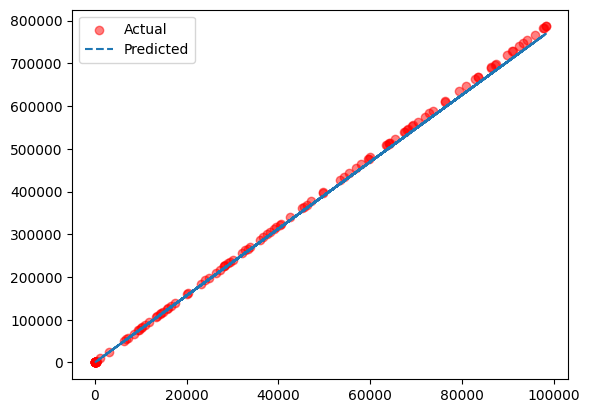

In [11]:
# Visualisation
plt.clf()
plt.scatter(my_value, [our_fn(x) for x in my_value], label='Actual', alpha=0.5, c="r")
plt.plot(my_value, predicted, '--', label='Predicted')
plt.legend(loc='best')
plt.show()

## Linear regression on a dataset
We will now be performing linear regression on a randomly generated dataset, and try to fit a line across the data.

We have to reset variables first from the previous section.

In [12]:
%reset -f 
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random

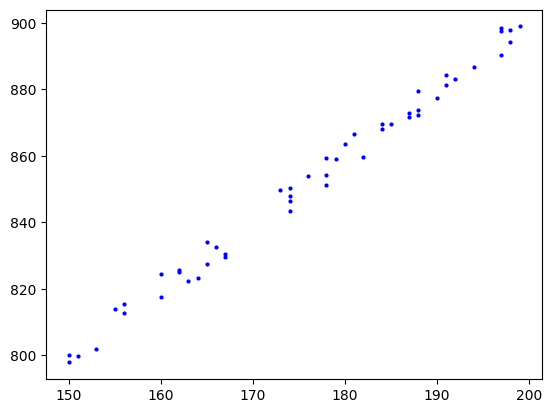

In [13]:
# Creating the dataset with random values. X from 150 to 200. Y = 2x + 500 + 5*(2*(random value) - 1)
size = 50
X = torch.Tensor([random.choice(list(range(150, 200))) for _ in range(size)])
Y = torch.Tensor([2*i+500+(random.random()*2-1)*5 for i in X])
X = X.unsqueeze(dim=1)
Y = Y.unsqueeze(dim=1)
plt.scatter(X, Y, c="b", s=4, label="Data")


In [17]:
# Building the model
model = nn.Sequential(
    nn.BatchNorm1d(1),
    nn.Linear(1,1),
)
loss_fn   = nn.MSELoss() # MSE (Mean Squared Error)
optimizer = torch.optim.SGD(params=model.parameters(), # optimize newly created model's parameters
                            lr=0.0001)

### Training
We will proceed to train the model.
We will use 100 epochs, and a learning rate of 0.0001. You can adjust it yourself. We will apply the loss function and optimizer.

In [18]:
import time
n_epochs = 100

loss_values = []
model.train()
for epoch in range(n_epochs):
    y_pred = model(X)
    optimizer.zero_grad()
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

    loss_values.append(loss.item())
    time.sleep(0.1)

Finished epoch 0, latest loss 728436.5
Finished epoch 1, latest loss 728022.0
Finished epoch 2, latest loss 727605.25
Finished epoch 3, latest loss 727171.625
Finished epoch 4, latest loss 726705.5
Finished epoch 5, latest loss 726188.9375
Finished epoch 6, latest loss 725598.625
Finished epoch 7, latest loss 724904.5
Finished epoch 8, latest loss 724066.25
Finished epoch 9, latest loss 723029.9375
Finished epoch 10, latest loss 721722.0
Finished epoch 11, latest loss 720042.9375
Finished epoch 12, latest loss 717858.0625
Finished epoch 13, latest loss 714985.625
Finished epoch 14, latest loss 711180.5625
Finished epoch 15, latest loss 706115.9375
Finished epoch 16, latest loss 699358.375
Finished epoch 17, latest loss 690340.875
Finished epoch 18, latest loss 678334.5
Finished epoch 19, latest loss 662425.25
Finished epoch 20, latest loss 641509.0625
Finished epoch 21, latest loss 614324.75
Finished epoch 22, latest loss 579558.625
Finished epoch 23, latest loss 536059.8125
Finished e

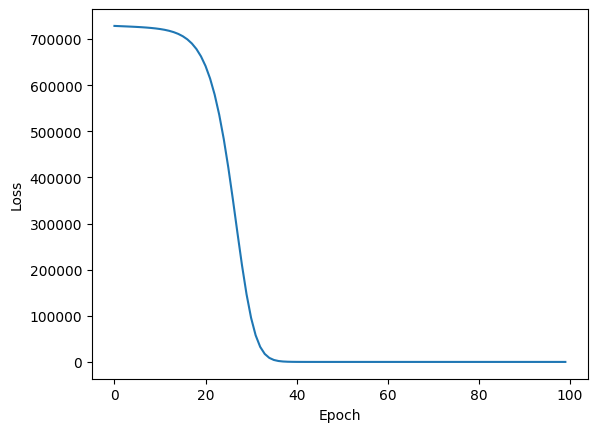

In [19]:
loss_values = np.array(loss_values)
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Evaluation
We will then proceed to obtain an evaluation of the data.  
We can visualise the prediction by plotting it as a best-fit line.

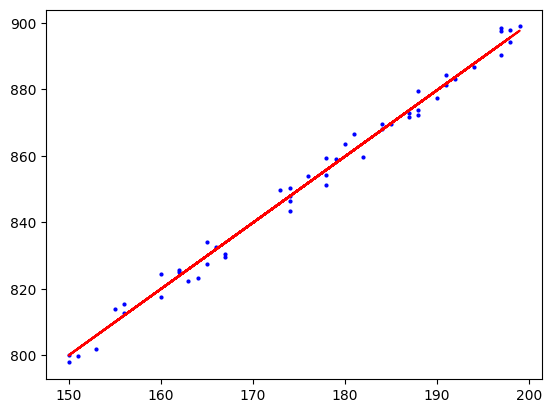

In [20]:
model.eval()
with torch.inference_mode():
    y_pred = model(X)
# Plot training data in blue
plt.scatter(X, Y, c="b", s=4, label="Actual data")
# Plot prediction data as a red line
plt.plot(X, y_pred, "r-" , label="Predictions data")
